# Statistics Concepts

In [1]:
# Importing the libraries
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

In [2]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
df

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [4]:
df.shape

(86, 23)

In [6]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df1 = df[vars] 
df1.head()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [10]:
df1[0:5]

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E


In [12]:
df1[-3:]

,Department,Lottery,Literacy,Wealth,Region
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [13]:
df1

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E
...,...,...,...,...,...
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


In [15]:
df1.isnull().sum()

Department    0
Lottery       0
Literacy      0
Wealth        0
Region        1
dtype: int64

In [16]:
df1.dropna()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,41,37,73,E
1,Aisne,38,51,22,N
2,Allier,66,13,61,C
3,Basses-Alpes,80,46,76,E
4,Hautes-Alpes,79,69,83,E
...,...,...,...,...,...
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E


In [18]:
df1.describe(include = 'all')

,Department,Lottery,Literacy,Wealth,Region
count,86,86.000000,86.000000,86.000000,85
unique,86,NaN,NaN,NaN,5
top,Finistere,NaN,NaN,NaN,W
freq,1,NaN,NaN,NaN,17
mean,NaN,43.500000,39.255814,43.500000,NaN
std,NaN,24.969982,17.364051,24.969982,NaN
min,NaN,1.000000,12.000000,1.000000,NaN
25%,NaN,22.250000,25.000000,22.250000,NaN
50%,NaN,43.500000,38.000000,43.500000,NaN
75%,NaN,64.750000,51.750000,64.750000,NaN


In [19]:
df1[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [20]:
df1.dropna(inplace = True)

<ipython-input-20-f74963dda761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace = True)


In [21]:
df1[-5:]

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


In [22]:
df1.mean()

Lottery     43.035294
Literacy    39.141176
Wealth      43.576471
dtype: float64

In [23]:
df1.median()

Lottery     43.0
Literacy    38.0
Wealth      44.0
dtype: float64

In [24]:
df1.mode()

,Department,Lottery,Literacy,Wealth,Region
0,Ain,1,31.0,1,C
1,Aisne,2,NaN,2,E
2,Allier,3,NaN,3,N
3,Ardeche,4,NaN,4,S
4,Ardennes,5,NaN,5,W
...,...,...,...,...,...
80,Vaucluse,81,NaN,82,NaN
81,Vendee,82,NaN,83,NaN
82,Vienne,84,NaN,84,NaN
83,Vosges,85,NaN,85,NaN


In [25]:
df1["Literacy"].describe()

count    85.000000
mean     39.141176
std      17.434335
min      12.000000
25%      25.000000
50%      38.000000
75%      52.000000
max      74.000000
Name: Literacy, dtype: float64

<b>DESCRIPTIVE STATISTICS</b><br>
Measures of Central Tendencies
- Mean
- Median
- Model

Measures of Variability
- Variance
- Standard Deviation
- Minimum Value
- Maximum Value
- Range of the values
- Kurtosis
- Skewness



In [32]:
min = df1["Literacy"].min()
min

12

In [33]:
max = df1["Literacy"].max()
max

74

In [31]:
range = max - min
print("The range = ",range)

The range =  62


In [35]:
standard_deviation = df1["Literacy"].std()
standard_deviation

17.434334584633955

In [36]:
df1["Literacy"].quantile(q = 0.25)

25.0

In [37]:
df1["Literacy"].quantile(q = 0.75)

52.0

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


{'whiskers': [<matplotlib.lines.Line2D at 0x29e92c0d0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x29e92c0d7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29e92c00d30>],
 'medians': [<matplotlib.lines.Line2D at 0x29e92c0de80>],
 'fliers': [<matplotlib.lines.Line2D at 0x29e92c1a220>],
 'means': []}

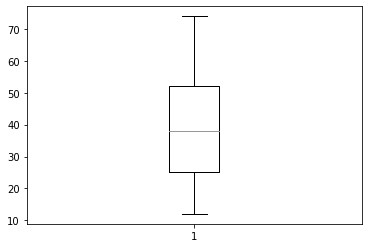

In [49]:
plt.boxplot(df1['Literacy'])

In [50]:
df1["Literacy"].skew()

0.3688452289854532

In [51]:
df1["Literacy"].kurtosis()

-0.8729461352109773